In [ ]:
# Table of Contents

- Asking Questions
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Results

In [ ]:
# QUESTIONS

Q1: What is the distribution of content on Netflix by year?
Q2: Are movies or TV series more popular on Netflix?
Q3: Which genres are more popular?
Q4: Which countries provide the most content to Netflix?

In [ ]:
## Data Wrangling
We will prepare the environment, load and assess dataset. Subsequently, we also clean and process the data for analysis.

Preparing the Environment

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the Excel file
file_path = r'C:/Users/Monster/Desktop/Exploring Netflix Movie and TV Series Trends.xlsx'
df = pd.read_excel(file_path)

# Quick look at the data
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
Data Overview and Missing Values

In [9]:
# General information about the dataset
df.info()

# Checking for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
 director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [ ]:
Handle Duplicates

In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
Fillna

In [13]:
# Fill the missing country values with “Unknown”
df['country'] = df['country'].fillna('Unknown')

In [ ]:
Exploratory Data Analysis


In [ ]:
Q1: What is the distribution of content on Netflix by year?

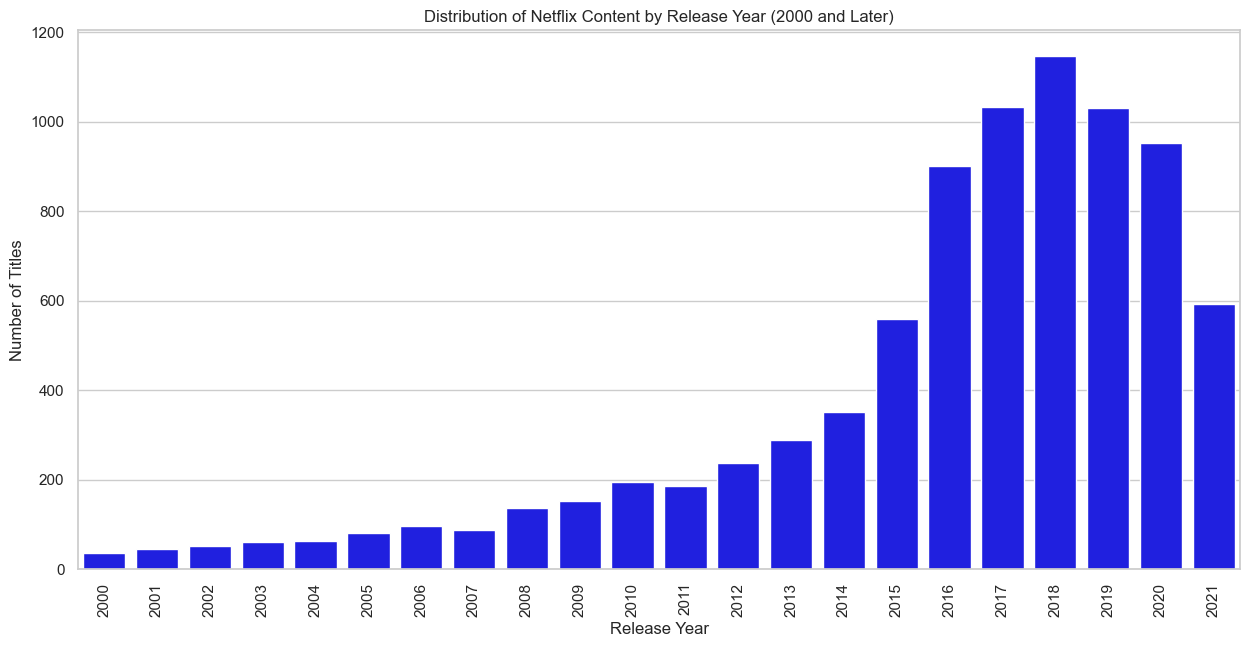

In [15]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_excel("C:/Users/Monster/Desktop/Exploring Netflix Movie and TV Series Trends.xlsx")

# 2000 and later
df_recent = df[df['release_year'] >= 2000]

# Calculate number of items by release_year
content_per_year = df_recent['release_year'].value_counts().sort_index()

# Chart plot
plt.figure(figsize=(15, 7))
sns.barplot(x=content_per_year.index, y=content_per_year.values, color='blue')
plt.title('Distribution of Netflix Content by Release Year (2000 and Later)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

In [17]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
From the graph, we observe a steady increase in the number of titles released each year starting from 2000, reaching a peak around 2018-2019. 
This trend indicates that Netflix has significantly expanded its content library over the years, especially in the late 2010s, 
likely due to increased production of original content and global expansion. However, there is a slight drop in 2020, possibly influenced 
by the COVID-19 pandemic’s impact on film and TV production worldwide.

In [ ]:
Q2: Are Movies or TV Series More Popular on Netflix?

In [21]:
df['type'].describe()

count      8807
unique        2
top       Movie
freq       6131
Name: type, dtype: object

C:\Users\Monster\AppData\Local\Temp\ipykernel_16176\3220185109.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


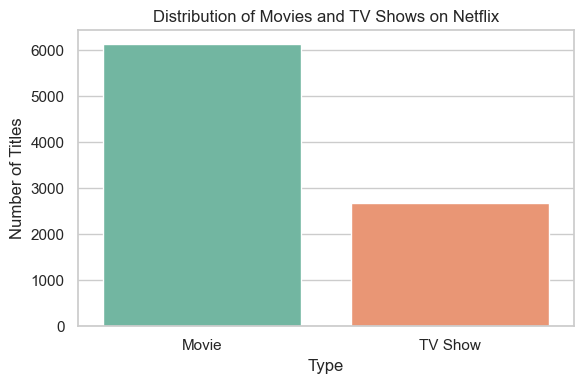

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Calculate numbers
type_counts = df['type'].value_counts()

# Chart
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.tight_layout()
plt.show()

In [ ]:
The vast majority of content on Netflix consists of movies. 
This may suggest that the platform places more emphasis on film production and licensing, or that user trends are in this direction.